# Characterizing Medication Effects on Genes Using Machine Learning
## Katharine Cross - Honors Thesis Project

#### Abstract:
Machine learning methods have been widely applied to the field of genomics and bioinformatics. Specifically incorporating novel machine learning algorithms to study gene-drug interactions has the potential to make a major positive impact on disease treatment and prevention. The Library of Integrated Network-Based Cellular Signature (LINCS) data sets is a National Institute of Health Common Fund Program that catalogs how human cells respond to chemical, genetic and disease perturbations. In this work, we first apply clustering techniques to identify group sub-population structure in the gene expression changes across multiple Vorinostat perturbations. We then apply external novel feature importance statistics constructed by knockoffs to identify important gene expression changes within each sub-population with the theoretically guaranteed false discovery rate. Our research has the potential to aid future novel drug discovery. The methodology explored in this study will be able to identify important gene expression changes affected by Vorinostat drug family perturbations. Identification of such gene-drug interactions can facilitate better understanding of the mechanism of the disease and identify new drug targets. 


## STEP 1: Initial Exploration

### About the Data:

There are 978 genes represented in this dataset (these are the rows in  the dataset). There are 3107 treatment observations and 3107 control observations (the columns). 

The columns of the data set represent robust z-scores for each gene across diffrent Vorinostat perturbations. It can therefore be assumed that there is a normal distrubtion, which makes generating knockoffs later in this study an appopriate method to use. 

In [1]:
# imports

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from scipy.stats import ttest_ind

In [6]:
# Upload Data Set 

with open(r'C:\Users\student\OneDrive - Bryant University\Desktop\Honors Thesis\readcombinedDatavorinostat.pkl', 'rb') as f:
    GeneMtx1, combined_df1 = pickle.load(f)

In [7]:
# Identify the Shape of the Gene Matrix

GeneMtx1.shape

(6214, 978)

In [10]:
combined_df1.shape

(6214, 3)

In [8]:
GeneMtx1[0,:]

array([ 2.75270009e+00, -7.92269993e+00, -1.22930002e+00, -1.16840005e+00,
        1.53929996e+00,  1.83829999e+00,  3.90899992e+00,  3.13380003e+00,
       -2.99100012e-01,  1.97600007e-01, -2.34260011e+00,  4.34910011e+00,
       -6.16520023e+00,  4.38889980e+00,  1.77059996e+00, -3.39260006e+00,
        1.88110006e+00,  1.08969998e+00,  9.56700027e-01,  8.63699973e-01,
        3.03340006e+00,  1.87530005e+00, -4.18399990e-01,  1.73889995e+00,
       -8.10459995e+00,  3.83739996e+00,  3.42050004e+00,  1.73130000e+00,
        1.00969994e+00, -5.88000007e-02, -5.94469976e+00, -7.81000033e-02,
       -2.12680006e+00,  1.21010005e+00,  0.00000000e+00,  2.22490001e+00,
        2.06000004e-02, -3.84200007e-01, -4.74240017e+00,  5.09030008e+00,
       -1.89129996e+00,  6.74499989e-01,  1.62670004e+00,  2.97989988e+00,
       -2.59080005e+00, -5.63600004e-01, -1.05017996e+01,  2.43249989e+00,
       -1.43729997e+00,  4.36990023e+00, -3.73810005e+00,  9.74099994e-01,
       -4.05770016e+00,  

In [8]:
combined_df1.corr()

,Unnamed: 0
Unnamed: 0,1.0


The Gene Matrix for the Vorinostat Drug Family has 6,214 elements, each with 978 elements

In [9]:
# See Top 5 Records

combined_df1.head()

,Unnamed: 0,inst_id,pert_iname
46555,46556,CPC004_HA1E_24H_X1_B3_DUO52HI53LO:B04,vorinostat
46556,46557,CPC004_HA1E_24H_X2_B3_DUO52HI53LO:B04,vorinostat
46557,46558,CPC004_HA1E_24H_X3_B3_DUO52HI53LO:B04,vorinostat
46597,46598,CPC004_HT29_6H_X1_B3_DUO52HI53LO:B04,vorinostat
46598,46599,CPC004_HT29_6H_X2_B3_DUO52HI53LO:B04,vorinostat


In [10]:
combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 46555 to 180181
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6214 non-null   int64 
 1   inst_id     6214 non-null   object
 2   pert_iname  6214 non-null   object
dtypes: int64(1), object(2)
memory usage: 194.2+ KB


In [11]:
combined_df1.describe()

,Unnamed: 0
count,6214.000000
mean,359048.002253
std,177076.125906
min,1.000000
25%,225872.500000
50%,375875.500000
75%,521577.500000
max,615201.000000


## STEP 2: Determing the Number of Clusters

In [12]:
# Create a Sub Population Containing Half of the Data
# This contains the Experimental Pertubation Observations for each Gene (excludes the control)

GeneMtx1Sub = GeneMtx1[0:3107,:]

GeneMtx1Sub.shape

(3107, 978)

In [16]:
GeneMtx1.max(),GeneMtx1.min()


(93.34750366210938, -79.44619750976562)

In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(GeneMtx1Sub)
                for k in range(1, 11)]

In [15]:
inertias = [model.inertia_ for model in kmeans_per_k]

In [16]:
silhouette_scores = [silhouette_score(GeneMtx1Sub, model.labels_)
                     for model in kmeans_per_k[1:]]     

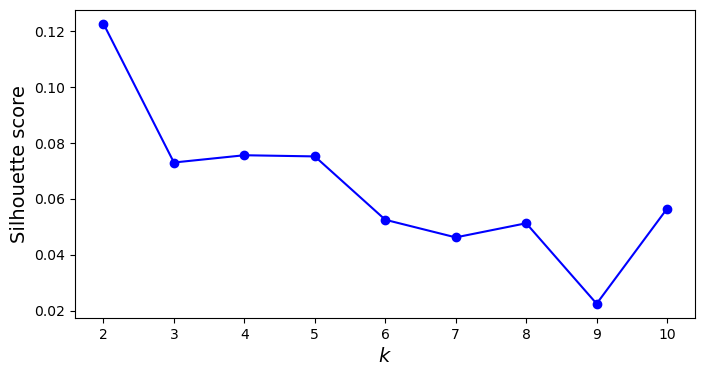

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

According to the Silhouette Score Chart, 2 clusters may be the Right Amount of Clusters for Modeling with the K-Means Machine Learning Algorithm, as 2 Clusters have much higher silhouette scores than any other number of clusters.

In [18]:
wcss=[]

silhouette_scores = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(GeneMtx1Sub)
    wcss.append(km.inertia_)

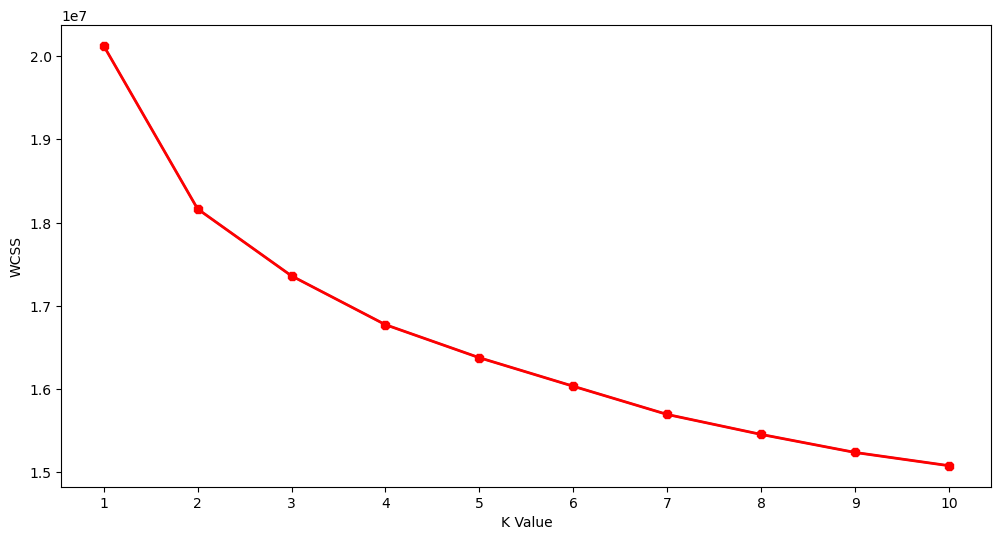

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

According to the Elbow Curve Method for Finding the Optimum 'k' Value for k-means Clustering, the K Value which forms an "elbow" looking part of the graph is the optimum k value. In the chart for our dataset, a k value of 2 appears to form the "elbow" of the chart. This provides further motivation for completing the future k-means clustering model with a "k" of 2. 

## STEP 3: Completing K-Means Clustering 

In [20]:
# Setting "k" to the pre-determined number of 2

km1=KMeans(n_clusters=2)

In [21]:
# Fitting the Input Data

km1.fit(GeneMtx1Sub)

KMeans(n_clusters=2)

In [22]:
# Predicting the Labels ("y") of the Input Data

y=km1.predict(GeneMtx1Sub)

In [28]:
# Converting the Array to a Dataframe & Initializing y

gene_df = pd.DataFrame(data=GeneMtx1Sub)
gene_df['y'] = y

Each Gene now has been labeled in the dataframe as either class 0 or class 1 based off of the k-means clustering model. 

## STEP 4: Cluster Differences Exploration 

In order to effectively visualize the differences between the two clusters, the 3107 Vorinostat Pertubation observations per Gene must be averaged in order to visualize one mean observation per Gene by cluster. 

In [29]:
# Grouping the Data by Class and Calculating the Mean

avg_by_cluster = gene_df.groupby(y).mean()
avg_by_cluster

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,y
0,0.981840,-4.349777,-0.736955,1.456087,0.766685,0.392623,0.994145,1.817665,1.006200,0.869988,...,0.227821,-3.295397,-0.177779,2.162034,0.375500,-0.820496,-1.356636,-0.317277,-4.213585,0.0
1,0.312489,-1.108969,-0.223275,0.307692,0.400450,0.202844,0.180482,0.149278,0.428045,0.041276,...,0.116080,-0.596596,0.213227,0.633789,0.081114,-0.624222,0.106689,0.043389,-0.899358,1.0


In [33]:
# Seperating Data by Label

cluster_0 = avg_by_cluster.iloc[0]
cluster_1 = avg_by_cluster.iloc[1]

### Histograms by Class

Individual Histograms of Each Class:

(-10.0, 10.0)

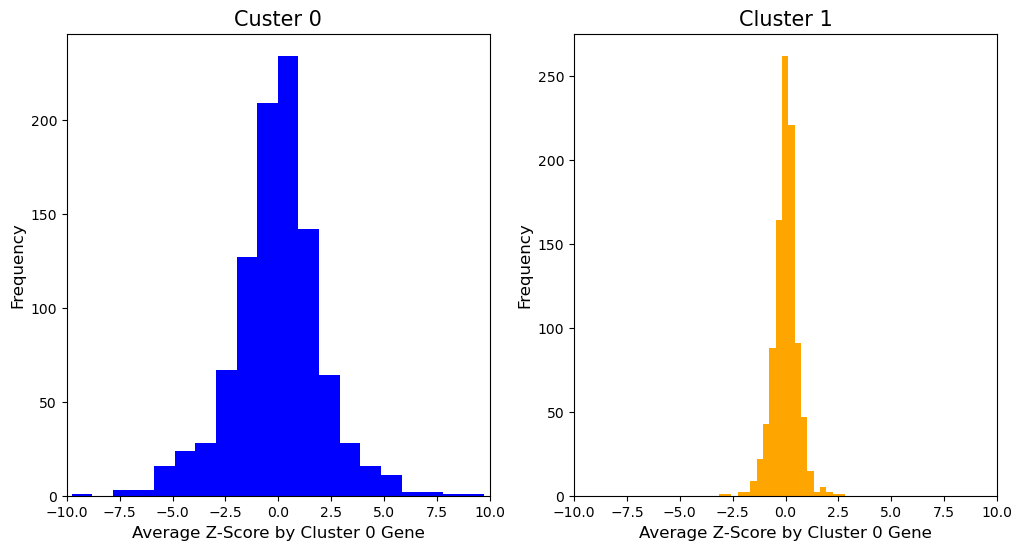

In [105]:
# Setting a Number of bins for the histogram
num_bins = 20

# Creating Subplots 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Creating a Histogram for Cluster 0
axes[0].hist(cluster_0.values.flatten(), bins=num_bins, color='blue')
axes[0].set_title('Custer 0', size = 15)
axes[0].set_xlabel('Average Z-Score by Cluster 0 Gene', size = 12)
axes[0].set_ylabel('Frequency', size = 12)
axes[0].set_xlim(-10, 10)  

# Creating a Histogram for Cluster 1 
axes[1].hist(cluster_1.values.flatten(), bins=num_bins, color='orange')
axes[1].set_title('Cluster 1', size = 15)
axes[1].set_xlabel('Average Z-Score by Cluster 0 Gene', size = 12)
axes[1].set_ylabel('Frequency', size = 12)
axes[1].set_xlim(-10, 10) 


Density Plot Comparing the Two Clusters:

In [109]:
# Combining the Two Seperate Class Datasets 

both_classes = pd.concat([cluster_0, cluster_1], axis = 0)

In [107]:
# Creating Labels for the Clusters

class_labels = [0] * len(cluster_0) + [1] * len(cluster_1)

In [110]:
# Creating the Dataframe

both_classes_df = pd.DataFrame({'Average Z-Score by Gene': both_classes.values.flatten(), 'Class': class_labels})

print(both_classes_df.head())

   Average Z-Score by Gene  Class
0                 0.981840      0
1                -4.349777      0
2                -0.736955      0
3                 1.456087      0
4                 0.766685      0


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

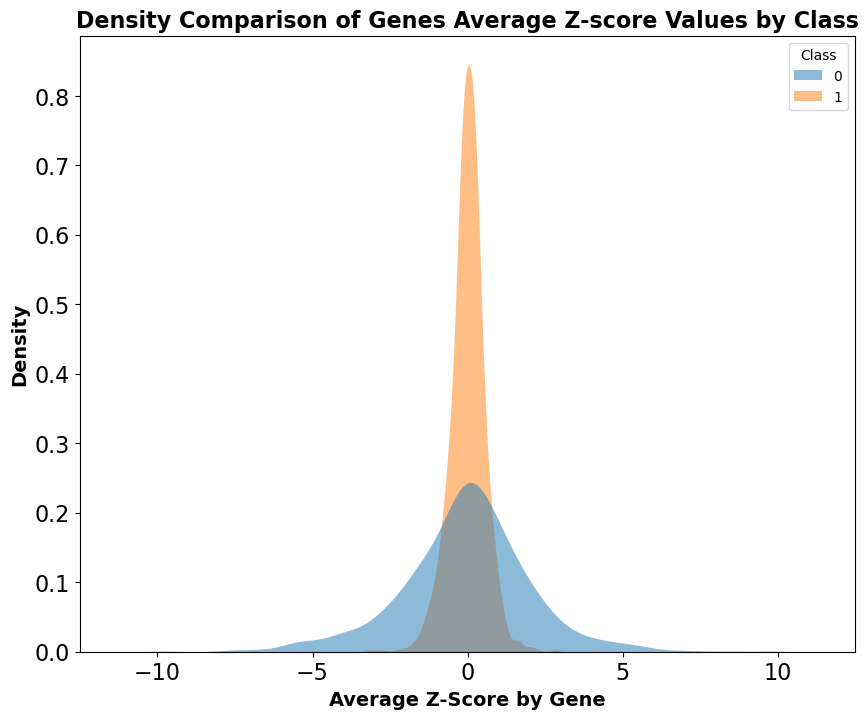

In [126]:
# Density Plot

plt.figure(figsize=(10, 8))

sns.kdeplot(
   data=both_classes_df, x="Average Z-Score by Gene", hue="Class",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0,
)

plt.xlabel('Average Z-Score by Gene', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Density Comparison of Genes Average Z-score Values by Class', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Box Plot Comparison by Class

Text(0.5, 1.0, 'Boxplot Comparison of Genes Average Z-score Values by Class')

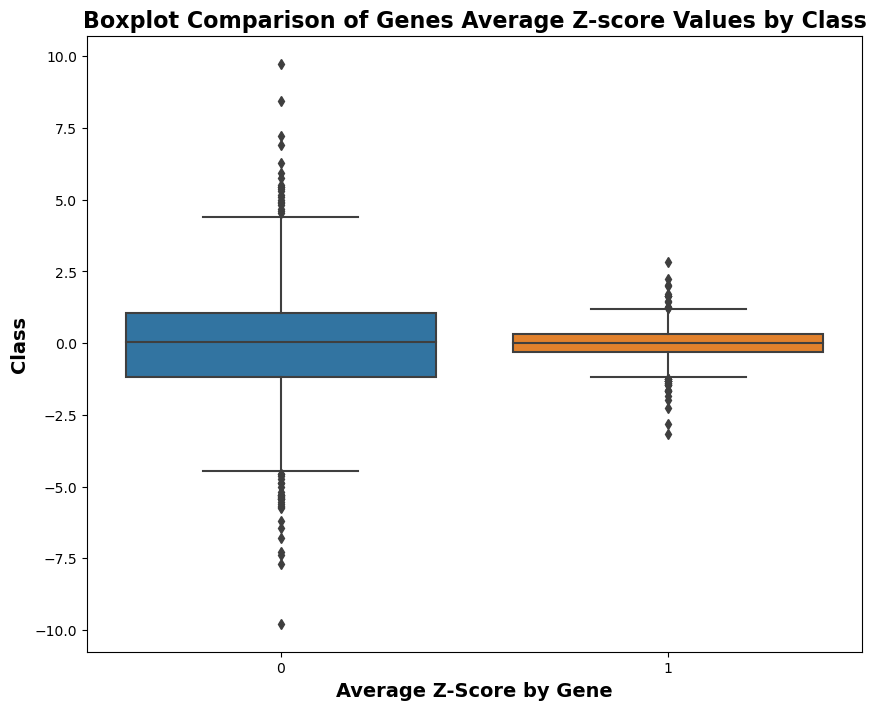

In [135]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Class', y='Average Z-Score by Gene', data=both_classes_df)

plt.xlabel('Average Z-Score by Gene', fontsize=14, fontweight='bold')
plt.ylabel('Class', fontsize=14, fontweight='bold')
plt.title('Boxplot Comparison of Genes Average Z-score Values by Class', fontsize=16, fontweight='bold')